In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [113]:
col1_data = np.random.normal(5, 1, 100)
col2_data = np.random.normal(5, 10, 100)
col3_data = np.random.normal(5, 100, 100)

In [114]:
df = pd.DataFrame({'col1': col1_data, 'col2': col2_data, 'col3': col3_data})
df.head()

,col1,col2,col3
0,4.789386,27.247996,-98.574043
1,4.075232,4.124278,-110.344373
2,5.309881,3.763187,99.921764
3,4.321166,-1.508523,-54.147809
4,4.618890,7.226060,5.597966


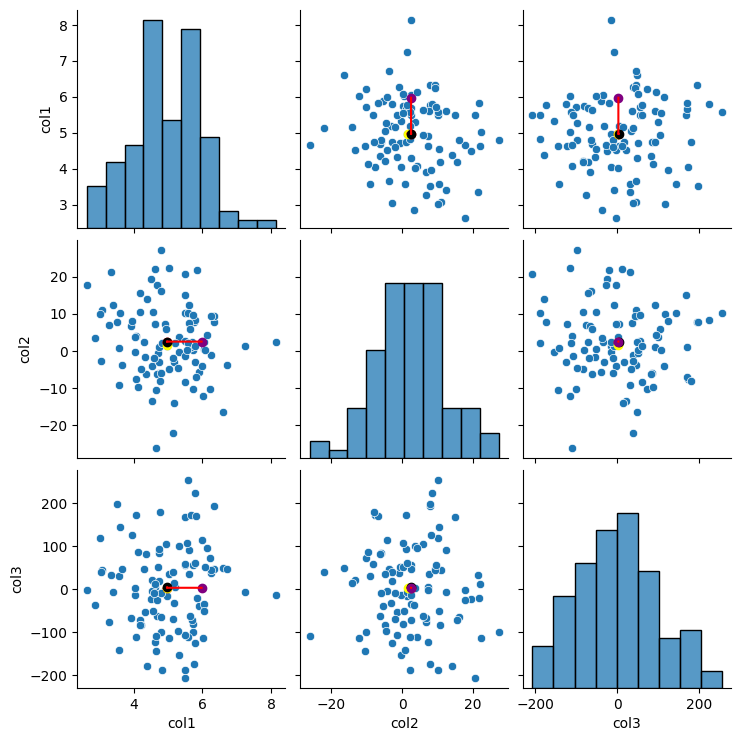

In [115]:
g = sns.pairplot(df)
mean_vectors = df.mean().values

covariance_matrix = df.cov()

eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

eigencolors = ["yellow", "black", "purple"]

for i, j in zip(*plt.np.triu_indices_from(g.axes, 1)):
    u1, u2 = mean_vectors[j], mean_vectors[i]
    g.axes[i, j].plot(u1, u2, 'ro')
    for index, vector in enumerate(eigenvectors):
        x, y = mean_vectors[j] + vector[j], mean_vectors[i] + vector[i]
        color = eigencolors[index] 
        g.axes[i, j].plot(x, y, marker='o', color=color)
        g.axes[i, j].plot([x, u1], [y, u2], 'r-')

for i, j in zip(*plt.np.tril_indices_from(g.axes, -1)):
    u1, u2 = mean_vectors[j], mean_vectors[i]
    g.axes[i, j].plot(mean_vectors[j], mean_vectors[i], 'ro')
    for index, vector in enumerate(eigenvectors):
        x, y = mean_vectors[j] + vector[j], mean_vectors[i] + vector[i]
        color = eigencolors[index]
        g.axes[i, j].plot(x, y, marker='o', color=color)
        g.axes[i, j].plot([x, u1], [y, u2], 'r-')
plt.show()

In [122]:
Q = eigenvectors.T
print(Q.shape)
Q

(3, 3)


array([[ 3.53195752e-04, -6.67065836e-03,  9.99977689e-01],
       [-9.99874219e-01, -1.58582910e-02,  2.47371604e-04],
       [-1.58562871e-02,  9.99851998e-01,  6.67542039e-03]])

In [123]:
Y = df.values @ Q
print(Y.shape)
Y

(100, 3)


array([[-9.87519144e+01, -5.24527465e+00,  2.65099978e+01],
       [-1.10367984e+02, -4.16741937e+00,  3.32245483e+00],
       [ 9.98963067e+01, -5.34417290e+00,  4.34545517e+00],
       [-5.41350116e+01, -4.31009444e+00, -1.93827672e+00],
       [ 5.55127030e+00, -4.73151677e+00,  7.18912104e+00],
       [ 3.81503259e+01, -6.23657776e+00, -8.03469664e-01],
       [ 5.67207577e+01, -5.52989442e+00,  2.94549147e+00],
       [-3.80914950e+01, -5.81296609e+00, -5.86297193e+00],
       [ 1.94000416e+02, -6.40516230e+00,  8.99094162e+00],
       [-8.07123742e+01, -5.76038216e+00, -3.74144276e-01],
       [-1.73311584e+02, -5.92828526e+00,  6.62673481e+00],
       [ 8.52066369e+01, -4.62201332e+00, -5.35829040e+00],
       [ 2.24791791e+02, -5.86839660e+00,  9.86709632e+00],
       [ 8.30231702e+01, -4.23804273e+00, -5.78164012e+00],
       [ 4.58098284e+01, -6.47130965e+00,  9.49012354e+00],
       [-1.77941403e+02, -4.64114789e+00,  1.28130040e+01],
       [-3.35331564e+00, -4.45366237e+00

In [126]:
cov_Y = np.cov(Y.T)
print(cov_Y.shape)
cov_Y

(3, 3)


array([[ 9.90265028e+03, -3.71365330e-13, -6.97079110e-13],
       [-3.71365330e-13,  9.75713645e-01,  5.73376574e-14],
       [-6.97079110e-13,  5.73376574e-14,  9.61615801e+01]])

In [127]:
print(eigenvalues)

[9.90265028e+03 9.75713645e-01 9.61615801e+01]
